In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv(r"C:\Users\HP\Desktop\ecommerce_dashboard_project\cleaned_data\cleaned.csv")
df['order_date'] = pd.to_datetime(df['order_date'])

In [7]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Temporal Analysis

In [8]:
print("="*50)
print("📊 BUSINESS OVERVIEW")
print("="*50)
total_revenue = df['total_price'].sum()
total_orders = len(df)
unique_customers = df['customer_id'].nunique()
avg_order_value = df['total_price'].mean()

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Orders: {total_orders:,}")
print(f"Unique Customers: {unique_customers:,}")
print(f"Average Order Value: ${avg_order_value:.2f}")

# 2. TEMPORAL ANALYSIS
print("\n" + "="*50)
print("📈 TEMPORAL TRENDS")
print("="*50)

# Monthly revenue trend
monthly_revenue = df.groupby(df['order_date'].dt.to_period('M'))['total_price'].sum()
print("\nMonthly Revenue Trend:")
print(monthly_revenue)

📊 BUSINESS OVERVIEW
Total Revenue: $22,966,957.00
Total Orders: 50,000
Unique Customers: 5,000
Average Order Value: $459.34

📈 TEMPORAL TRENDS

Monthly Revenue Trend:
order_date
2022-01    1035512
2022-02     951751
2022-03     945412
2022-04     927662
2022-05    1035970
2022-06     919997
2022-07     910046
2022-08     957185
2022-09     924183
2022-10     992028
2022-11     967817
2022-12     957318
2023-01     963250
2023-02     907056
2023-03    1000073
2023-04     904903
2023-05     948577
2023-06     888496
2023-07     959182
2023-08    1002356
2023-09     960510
2023-10     918981
2023-11     964509
2023-12    1004242
2024-01      19941
Freq: M, Name: total_price, dtype: int64


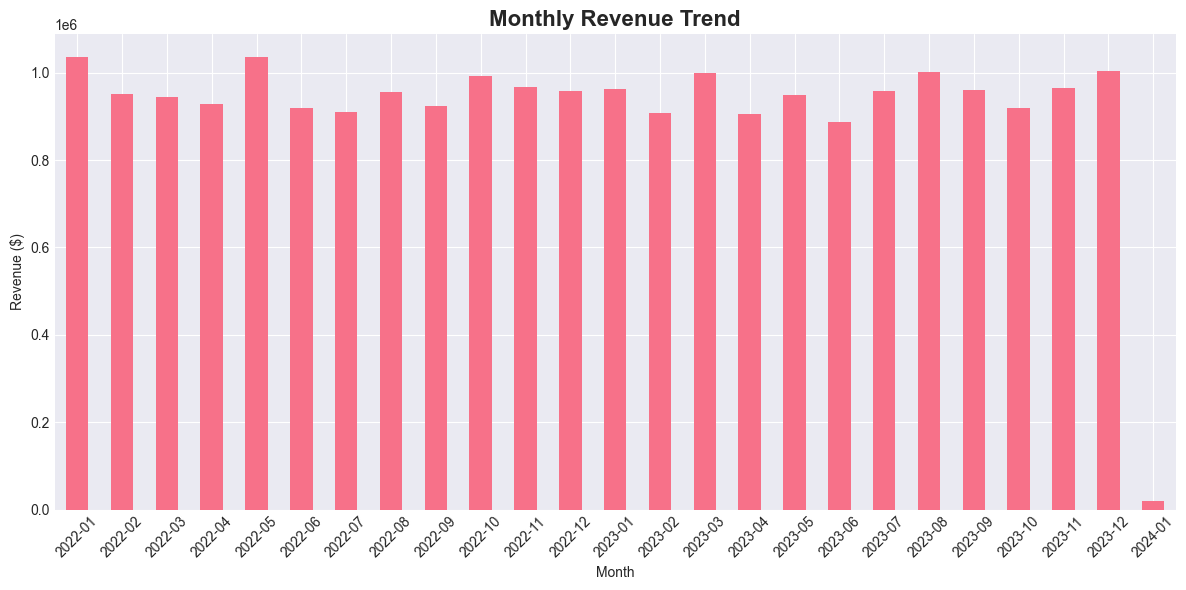

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
monthly_revenue.plot(kind='bar', ax=ax)
ax.set_title('Monthly Revenue Trend', fontsize=16, fontweight='bold')
ax.set_xlabel('Month')
ax.set_ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"C:\Users\HP\Desktop\ecommerce_dashboard_project\docs\Screenshots\monthly_trend", dpi=300)
plt.show()

# Product Analysis

In [10]:
print("\n" + "="*50)
print("🛍️ TOP PRODUCTS")
print("="*50)

top_products = df.groupby('product_name').agg({
    'total_price': 'sum',
    'order_id': 'count'
}).rename(columns={'total_price': 'revenue', 'order_id': 'orders'})\
.sort_values('revenue', ascending=False).head(10)

print(top_products)


🛍️ TOP PRODUCTS
               revenue  orders
product_name                  
Curtains       1220460    2489
Laptop         1219329    2587
Lamp           1197969    2532
Smart Watch    1190114    2515
Children Book  1187197    2506
Fiction Novel  1187091    2459
T-Shirt        1167187    2563
Headphones     1160726    2433
Dress          1157275    2486
Biography      1147452    2458


# Geographic Analysis

In [11]:
print("\n" + "="*50)
print("🌍 GEOGRAPHIC PERFORMANCE")
print("="*50)

country_perf = df.groupby('customer_country').agg({
    'total_price': 'sum',
    'order_id': 'count',
    'customer_id': 'nunique'
}).rename(columns={
    'total_price': 'revenue',
    'order_id': 'orders',
    'customer_id': 'customers'
}).sort_values('revenue', ascending=False)

print(country_perf)


🌍 GEOGRAPHIC PERFORMANCE
                  revenue  orders  customers
customer_country                            
Australia         3996323    8405       4028
Germany           3915535    8312       4038
UK                3847809    8300       4029
France            3800192    8272       4079
USA               3705259    8380       4045
Canada            3701839    8331       4042


# TRAFFIC SOURCE ANALYSIS

In [12]:
print("\n" + "="*50)
print("📱 TRAFFIC SOURCE PERFORMANCE")
print("="*50)

traffic_perf = df.groupby('traffic_source').agg({
    'total_price': 'sum',
    'order_id': 'count'
}).rename(columns={
    'total_price': 'revenue',
    'order_id': 'orders'
}).sort_values('revenue', ascending=False)

print(traffic_perf)


📱 TRAFFIC SOURCE PERFORMANCE
                revenue  orders
traffic_source                 
Direct          4258392    9101
Social Media    4163607    8991
Paid Ads        4113722    8895
Organic         4073787    8950
Email           4061716    9063
Unknown         2295733    5000
